#A Statistical Approach to Skiing
####Cole Hanlon
***
<div style="text-align:center">
    <img src="images/FWT_logoresize.jpg" />
</div>
***

The Freeride World Tour (FWT) is a series of skiing events that take place in locations around the world during the winter season. Athletes competing are from all around the world. During each event a unique mountain face is selected, which is not part of a defined ski area. Each event includes both men and womens, who ski and snowboard. However, to reduce complexity we will focus on men's skiing. The terrain is often untracked and athletes must study the terrain features to put together a 'line'. A 'line' consists of skiing open faces, jumping off features, dropping cliffs, and skiing technical terrain. 

First we must import all needed libraries for this analysis.

In [1690]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [1691]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

***
##A Look at the Data
Read in our data and remove extra columns.

In [1692]:
df =  pd.read_csv('data/FWT_data.csv')
df.drop('Unnamed: 10', axis=1, inplace=True)
df.drop('Unnamed: 11', axis=1, inplace=True)
df = df.set_index("skier")
df

,airs,spins,inverts,crashes,largest_spin,largest_invert,largest_magnitude,largest_landed,score
skier,,,,,,,,,
Mickael Bimboes,5,0,0,0,0,0,3,1,70.00
Drew Tabke,6,0,0,0,0,0,4,1,75.00
Andrew Pollard,5,0,0,1,0,0,2,0,42.00
Carl Eriksson,5,0,1,0,0,1,2,1,61.67
Yu Sasaki,4,1,0,0,1,0,4,1,78.33
Liam Peiffer,2,0,0,0,0,0,4,1,65.33
Yann Baudron,5,1,0,1,0,0,3,1,28.67
Reine Barkered,5,0,1,0,0,1,4,1,76.67
Markus Eder,7,2,1,0,1,1,4,1,86.67


As seen in the data frame, we have many different data features. These features includes, *skier, airs, spins, inverts, crashes, largest_spin, largest_invert, largest_magnitude, largest_landed,* and *score*. 

The meaning of each is explained below,

* Skier: This includes the name of the skier, to which the following columns and data belong
* Airs: Total number of times a skier jumps off something during the event
* Spins: Total number of times a skier performs a 360 degree spin while in the air
* Inverts: Total number of times a skier flips, either back or forward while in the air
* Crashes: Total number of times a skier crashes in the event
* Largest_Spin: Total number of spins in the skier's largest trick in the event
* Largest_Invert: Total number of flips in the skier's largest trick in the event
* Largest_Magnitude: A value in the range of 1-5, describing the distance travelled in air of the skier's largest trick
* Largest_Landed: True or false value determing if the skier landed their largest trick, 1=landed and 0=crashed
* Score:The final score the skier received from the judges

Unfortunately skiing does not have defined stats, unlike major sports such as basketball and baseball. These data features were selected based on judging criteria, as the analysis has a goal of determining if judging is unbiased and if there is a statistical approach to skiing. The decision behind collecting these data features, and scoring outline will be discussed in the next section. Looking back at our data, it is very clean, as this data is not made available by the FWT. The data was collected manually, by watching an event and recording data into Excel, then exporting into a CSV file, which is available. The event picked was in Hakuba, Japan in 2019. This was selected as it is the video/livestream replay that has the most views on the FWT YouTube channel, signalling that it was perhaps their most popular event to take place. This video can be found here; [LIVE WEBCAST Replay - Freeride World Tour Hakuba Japan 2019](https://www.youtube.com/watch?v=aXQnYTHspiE). It would only make an alaysis stronger to have record more events. However, it is very time consuming to watch an event. This results in a small dataset for this event and analysis. The only issue in this data is that two skier's were unable to participate and they must be removed from the dataset.

We must remove the two who did not participate, Wadeck Gorak and Leo Slemett.

In [1693]:
df.drop("Wadeck Gorak", inplace=True)
df.drop("Leo Slemett", inplace=True)

##Judging and Scoring

When speaking to others, and observing FWT events it seems that judging and scoring is somewhat biased. It seems that well known skier's have an automatic higher score. This is something that is important to evaluate. The FWT has a [Judging Handbook](https://www.freerideworldtour.com/sites/default/files/2021_judging_handbook.pdf). Reading through this handbook confirms that there are 5 categories judges focus on when it comes to scoring. These categories are all supposed to equally impact a skier's score. The 5 categories are, *Line, Fluidity, Control, Air & Style,* and *Technique*. Judges seem to have a baseline score, then deduct and add points from performance in each of these categories. After each run, the FWT shows a graphic which shows judges thoughts on these five categories.

<div style="text-align:center">
    <img src="images/FWT_criteriaresize.jpg" />
</div>

As seen above, this skier should have points added to the baseline score for line and many points deducted from all other categories. The data features chose can all be used to evaluate each of these categories.

***
##Baseline Score

We should first determine what a baseline score would be. We should first calculate an average of scores.

In [1694]:
avg_score = df['score'].mean()
avg_score

59.934000000000005

Knowing that crashes will most likely result in a deduction of points, and spins/inverts will result in additional scores. We should evaluate where no spins, inverts, or crashes take place.

In [1695]:
straight_airs_df = pd.read_csv('data/FWT_data.csv')
straight_airs_df.drop('Unnamed: 10', axis=1, inplace=True)
straight_airs_df.drop('Unnamed: 11', axis=1, inplace=True)
straight_airs_df = straight_airs_df.set_index("skier")
straight_airs_df.drop("Wadeck Gorak", inplace=True)
straight_airs_df.drop("Leo Slemett", inplace=True)

straight_airs_df.drop(straight_airs_df[straight_airs_df['spins'] > 0].index, inplace=True) #Remove spins
straight_airs_df.drop(straight_airs_df[straight_airs_df['inverts'] > 0].index, inplace=True) #Remove inverts
straight_airs_df.drop(straight_airs_df[straight_airs_df['crashes'] > 0].index, inplace=True) #Remove crashes

straight_airs_df

,airs,spins,inverts,crashes,largest_spin,largest_invert,largest_magnitude,largest_landed,score
skier,,,,,,,,,
Mickael Bimboes,5,0,0,0,0,0,3,1,70.00
Drew Tabke,6,0,0,0,0,0,4,1,75.00
Liam Peiffer,2,0,0,0,0,0,4,1,65.33
Aymar Navarro,4,0,0,0,0,0,5,1,73.00


From just a simple glance of this new data frame, we can see that all scores are actually very similary. The scores are in a much tighter range than the whole event. 

With a minimum score of,


In [1696]:
straight_airs_df['score'].min()

65.33

A maximum score of,


In [1697]:
straight_airs_df['score'].max()

75.0

This difference is relatively small, however, it seems it can be explained by the lack of airs resulting in the minimum score.

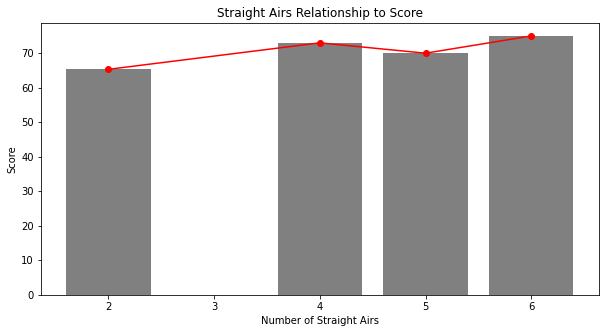

In [1698]:
straight_airs_df.sort_values(by=['airs'], inplace=True)

plt.subplots(1, 1, figsize = (10, 5))
plt.bar(straight_airs_df['airs'], straight_airs_df['score'], color='gray')
plt.plot(straight_airs_df['airs'], straight_airs_df['score'], '-o', color='red')

plt.title('Straight Airs Relationship to Score')
plt.xlabel('Number of Straight Airs')
plt.ylabel('Score')
plt.show()

We see above that the number of airs does play an impact in increasing score when no spins, inverts or crashes occur. The data we have is so small, that we see a dip where the number of airs is equal to 5. This is due to just having a single skier, and a single run for each of these data points. This could mean Mickael Bimboes, who did 5 airs, still had some other impacts in his run that reduced his score, but were not recorded in the data set. This is why a larger data set would be more beneficial. We should now figure out what the average score is for an average number of airs, with no other scoring impacts (no spins, inverts, or crashes).

In [1699]:
baseline_airs = straight_airs_df['airs'].mean()
baseline_score = straight_airs_df['score'].mean()

print("Baseline Airs: ", baseline_airs)
print("Baseline Score: ", baseline_score)

Baseline Airs:  4.25
Baseline Score:  70.8325


We can now start working off a baseline score of 70.8325 points when a run has about 4 airs, and no spins, inverts, or crashes. This is further backed up as the scores of Aymar Navarro and Mickael Bimboes are very similar, with 4 and 5 airs respectively. The score of Aymar Navarro is above this baseline with only 4 airs is evidenced by his above average magnitude on his largest air. Whereas, Mickael Bimboes had an average magnitude, with slighlty more airs than average, and resulted in a lower score.

***
##Line

A 'line' as explained before is a skier's path down the mountain face. A skier will have to choose a 'line' that has multiple features in order to do airs, spins, and inverts. Therefore, we can evaluate a skier's line through their total number of airs, and their largest_magnitude. As we will be able to see how risky their 'line' selection is, and how exciting it is. Again, we will not want to evaluate any crashes. Inverts and spins should also not have an impact.

Working from a baseline of ~70 points for an average run of 4.25 airs, we should divide this value by the 5 categories, to understand the baseline points of each category.

In [1700]:
category_baseline = baseline_score / 5
category_baseline

14.1665

We can now work based on expected values for a scoring system, where we multiply the category baseline to a calculated weight based on performance in the category. The weight can be both positive and negative, to add and subtract points, however, can only add a maximum of 6 points, to reach the maximum score of 100. This weighting will take into account probability inderctly, through a negative value when crashes occur.

An equation will be defined as,

\begin{gather*}
E[x]=14W_1[x]+14W_2[x]+...+14W_5[x]
\end{gather*}

Each W value can be calculated through the appropriate data features, and will have an impact.

***
It is importat to quickly touch on which data features impact each of these categories.

##Fluidity
This category is determined by a skier having fluid motion down the mountain face. Therefore, a good consistency of airs, and no crashes would result in the highest score in this category. Crashes would be the most impactful on this category, as a crash would ruin fluidity.

##Control
This category defines how in control a skier was down the mountain face. To be in control relies solely on not crashing. Therefore, crashes is again the most impactful of this category, and the only data feature that impacts this category.

##Air & Style
This category defines the skier's number of airs, spins, and inverts. This category also includes style, which is impacted again by tricks, however, crashing does leave a bad impact on style. While the number of airs, spins, and inverts are all included, crashes make up a large portion of this category too.

##Technique
This category is again going to take in some role of airs, spins, and inverts. However, again crashing will have a significant impact on the category.

##Crashes
As we can see, crashes are involved in all categories. While trying to evaluate a weight for each category is an interesting apporach. It seems that the FWT is defined really around crashes. Therefore, an approach to take is evaluating runs with and without crashes, then evaluating scoring differences to understand how judging works.

***
##No Crashes Investigation

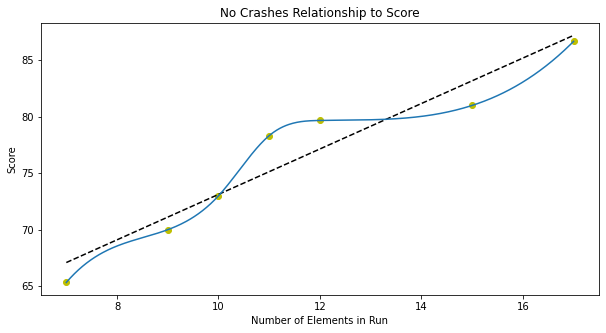

In [1701]:
no_crash_df = pd.read_csv('data/FWT_data.csv')
no_crash_df.drop('Unnamed: 10', axis=1, inplace=True)
no_crash_df.drop('Unnamed: 11', axis=1, inplace=True)
no_crash_df = no_crash_df.set_index("skier")
no_crash_df.drop("Wadeck Gorak", inplace=True)
no_crash_df.drop("Leo Slemett", inplace=True)

no_crash_df.drop(no_crash_df[no_crash_df['crashes'] > 0].index, inplace=True) #Remove crashes

no_crash_df['total_elements'] = no_crash_df[list(no_crash_df.columns)].sum(axis=1) - no_crash_df['score'] 

no_crash_df = no_crash_df.sort_values('score').drop_duplicates('total_elements', keep='last')

x = no_crash_df['total_elements'].to_numpy()
y = no_crash_df['score'].to_numpy()
 
cubic_interploation_model = interp1d(x, y, kind = "cubic")
 
X_= np.linspace(x.min(), x.max(), 500)
Y_ = cubic_interploation_model(X_)

coef = np.polyfit(x,y,1)
poly_fn = np.poly1d(coef) 

plt.subplots(1, 1, figsize = (10, 5))
plt.plot(x,y, 'yo', x, poly_fn(x), '--k')
plt.plot(X_, Y_)
plt.title('No Crashes Relationship to Score')
plt.xlabel('Number of Elements in Run')
plt.ylabel('Score')
plt.show()

As seen above, a dataframe was created that only included rows where no crashes occured, then condensed based on a new column called, *total_elements*. This column is a summation of all airs, inverts, spins, and largest features. The formula is simply,

\begin{gather*}
totalElements = airs+spins+inverts+largestSpin+largestInvert+largestMagnitude
\end{gather*}

We then have a data point about how many elements were involved in a run with no crashes. To make thigs simply, I have only kept the max score, when there are multiple skier's with the same number of total elements. This resulted in a bit of outliers in 11 and 12 total elements. However, overlaying a linear regression on the above plot still shows strong evidence of a linear relation amont total elements increasing and score directly increasing. Of course this is simplified here as there are no crashes.

We should then investigate runs with crashes, and see if a relation can be generated similar to score decreasing with number of crashes decreasing the number of total elements.

***
##Crashes Investigation

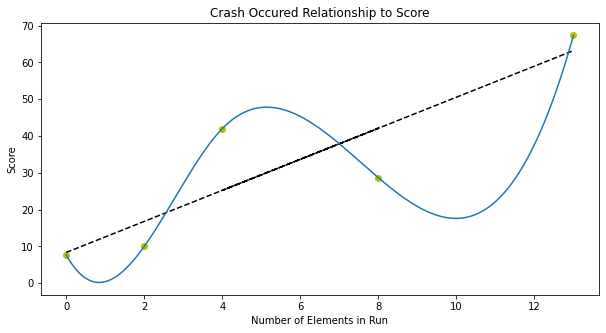

In [1702]:
crashes_df = pd.read_csv('data/FWT_data.csv')
crashes_df.drop('Unnamed: 10', axis=1, inplace=True)
crashes_df.drop('Unnamed: 11', axis=1, inplace=True)
crashes_df = crashes_df.set_index("skier")
crashes_df.drop("Wadeck Gorak", inplace=True)
crashes_df.drop("Leo Slemett", inplace=True)

crashes_df.drop(crashes_df[crashes_df['crashes'] < 1].index, inplace=True)

crashes_df['total_elements'] = crashes_df['airs'] + crashes_df['spins'] + crashes_df['inverts'] - pow(crashes_df['crashes'], 2) + (crashes_df['largest_magnitude'] + crashes_df['largest_invert'] + crashes_df['largest_spin']) * crashes_df['largest_landed']

crashes_df = crashes_df.sort_values('score').drop_duplicates('total_elements', keep='last')

x = crashes_df['total_elements'].to_numpy()
y = crashes_df['score'].to_numpy()
 
crashed_cubic_interploation_model = interp1d(x, y, kind = "cubic")
 
X_= np.linspace(x.min(), x.max(), 500)
Y_ = crashed_cubic_interploation_model(X_)

crashed_coef = np.polyfit(x,y,1)
crashed_poly_fn = np.poly1d(crashed_coef) 

plt.subplots(1, 1, figsize = (10, 5))
plt.plot(x,y, 'yo', x, crashed_poly_fn(x), '--k')
plt.plot(X_, Y_)
plt.title('Crash Occured Relationship to Score')
plt.xlabel('Number of Elements in Run')
plt.ylabel('Score')
plt.show()


The graph shown above has an extreme variance in the new calculation of total elements against the score given. This begins to question the validity of scoring. We can see a linear regression does again show a general increase of score when this new total elements is calculated. The new formula for total elements which takes into account crashes is,

\begin{gather*}
totalElements = airs+spins+inverts+(largestSpin+largestInvert+largestMagnitude)*largestLanded-crashes^2
\end{gather*}

Therefore, through this equation we give skier's points for all their airs, spins, and inverts. However, only give elements from the largest category when they land this particular trick. This gives skier's points for their efforts, and takes away elements for their number of crashes. The number of crashes is squared, as a simple look at the scoring shows a dramatic increase in score reduction when a skier crashes multiple times. It is very hard to measure this exponential value, so we will simply use an exponent 2. 

This new more complex formula for *totalElements*, simply includes the ability to reduce the number based on crashes occuring. Previously, no crashes occured, using this more complex formula will yield the same values for skier's with no crashes as the simplified equation.

***
##Comparing Not Crashing Against Crashing
We can now compare the two linear regression functions,

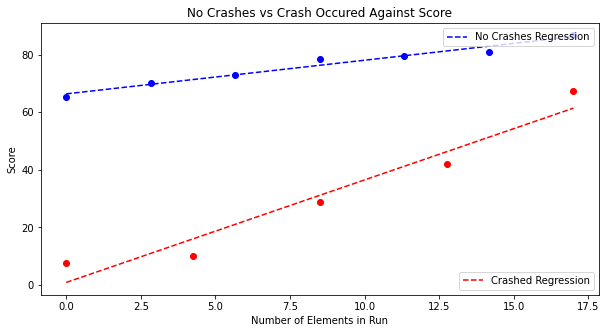

In [1703]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
x = np.linspace(0, no_crash_df['total_elements'].max())

x = np.linspace(0, no_crash_df['total_elements'].max(), crashes_df['total_elements'].size)
y = crashes_df['score'].to_numpy()

crashed_cubic_interploation_model = interp1d(x, y, kind = "cubic")
 
X_= np.linspace(x.min(), x.max(), 500)
Y_ = crashed_cubic_interploation_model(X_)

crashed_coef = np.polyfit(x,y,1)
crashed_poly_fn = np.poly1d(crashed_coef) 

line1, = ax.plot(x, crashed_poly_fn(x), '--r', label="Crashed Regression")
line2, = ax.plot(x,y, 'ro')
first_legend = ax.legend(handles=[line1], loc='lower right')
ax.add_artist(first_legend)

x = np.linspace(0, no_crash_df['total_elements'].max(), no_crash_df['total_elements'].size)
y = no_crash_df['score'].to_numpy()
 
cubic_interploation_model = interp1d(x, y, kind = "cubic")
 
X_= np.linspace(x.min(), x.max(), 500)
Y_ = cubic_interploation_model(X_)

coef = np.polyfit(x,y,1)
poly_fn = np.poly1d(coef) 

line3, = ax.plot(x, poly_fn(x), '--b', label="No Crashes Regression")
line4, = ax.plot(x,y, 'bo')
ax.legend(handles=[line3], loc='upper right')

plt.title('No Crashes vs Crash Occured Against Score')
plt.xlabel('Number of Elements in Run')
plt.ylabel('Score')
plt.show()

With these two regressions on the same plot, we can clearly see there is some sort of bias towards automatically deeming lower scores for runs with crashes. The regression function that was generated for "Crashed Regression" uses the scoring data for when crashes occur. However, using our *totalElements* formula, we can still generate the same number of elements as a "No Crashes Regression" scenario. However, we still have this looming stigma over a run where a skier crashes. While a skier could crash, but still come back and land many airs, spins, and inverts, the crash outweighs all of this. Once you crash, you immediately will not receive the same credit for landing the same tricks later on as a skier who did not crash. This seems somewhat unfair, as a skier could hit bad snow causing them to crash. This points to the idea that perhpas judges do not equally weight all categories. When thinking about this, we must go back to what elements make up a category. Crashes are an element of many categories, perhaps involved in more categories than a single other data feature. Thus, crashes have an impact on nearly all categories.

The slopes of both regressions are also different,

In [1704]:
no_crash_slope = (poly_fn(15)-poly_fn(10))/5
crashed_slope = (crashed_poly_fn(15)-crashed_poly_fn(10))/5

print("No Crashes Slope: ", no_crash_slope)
print("Crashed Slope: ", crashed_slope)

No Crashes Slope:  1.1683613445378143
Crashed Slope:  3.5604705882352947


Here we can see for the same difference of *totalElements* values, the slope for the "Crashed Regression" is much larger, more than 3 times that of the "No Crashes Regression". This shows that when a crash occurs, you will obviously receive a large point deduction. However, you can recoup some points faster by making a recovery and doing airs, inverts and spins. We can clearly see in the above plot that once a crash does occur, while you can gain points quicker, a skier will never reach the same point value as a skier who did not crash.
***

##Judging Conclusion

In conclusion, a skier must strategize their run to abosolutely not crash. If a crash occurs they must understand that their run is practically over, and they don't have any way to recover lost points. This is unfortunate, and shows that taking risk is actually not rewarding in this skiing event. The scoring should perhaps reevaluate this, as risk taking is what makes the event enjoyable to watch. A winning run would be modest, whereas an entertaining and exciting one would perhaps result in a low score if a crash were to occur.

***
##Social Media

As a quick aside, social media has a large role on society today. Instagram seems to be the most popular for "ski culture" as many skier's post daily on their Instaram stories, and frequently post short videos of their successes. We should take a look at if *totalElements* somehow plays a role in terms of follower count. As follower count is the easiest way to see social media sucess.

Read in follower data,

In [1705]:
followers_df =  pd.read_csv('data/FWT_followers.csv')
followers_df = followers_df.set_index("skier")
followers_df

,followers
skier,
Mickael Bimboes,56100
Drew Tabke,13900
Andrew Pollard,11400
Carl Eriksson,12800
Yu Sasaki,7435
Liam Peiffer,1467
Yann Baudron,7555
Reine Barkered,34800
Markus Eder,230000


Here we can see a simple dataframe of a skier and their follower count. Instagram does not show followers down to an exact value once followers exceeds 10,000. These rounded values should be close. Also, unfortunately the Instragram API does not have a way to retrieve old follower counts. As a more interesting analysis would be to check follower percentage gain before and after this event. To see if riskier skiers were able to gain a higher percentage of followers.

Plotting *totalElements* against followers,

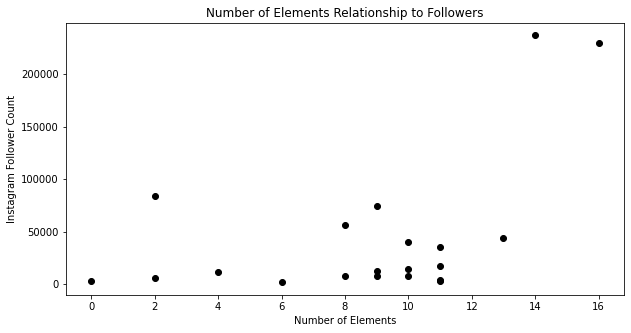

In [1706]:
followers_df['total_elements'] = df['airs'] + df['spins'] + df['inverts'] - pow(df['crashes'], 2) + (df['largest_magnitude'] + df['largest_invert'] + df['largest_spin']) * df['largest_landed']

plt.subplots(1, 1, figsize = (10, 5))
plt.plot(followers_df['total_elements'], followers_df['followers'],'ko')

plt.title('Number of Elements Relationship to Followers')
plt.xlabel('Number of Elements')
plt.ylabel('Instagram Follower Count')
plt.show()

Seen above, there isn't much of a relationship. The two highest *totalElements* values do have the highest follower counts, which is intersting. However, there seems to be a very average number of followers below the value of 50,000. This could perhaps point to a total of dedicated ski and FWT fans that is around 50,000. Where people are likely to follow all skiers of the FWT.

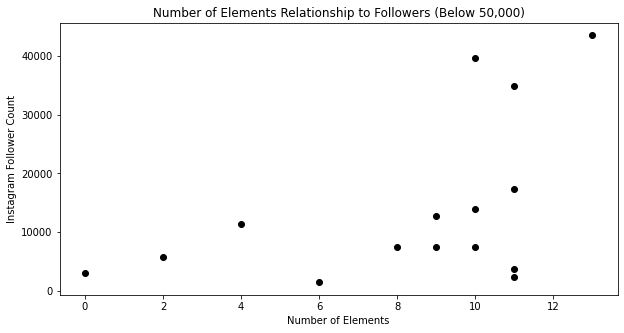

Average Followers:  15028.8125


In [1707]:
sub_50_df = pd.read_csv("data/FWT_followers.csv")
sub_50_df = sub_50_df.set_index("skier")

sub_50_df.drop(sub_50_df[sub_50_df['followers'] > 50000].index, inplace=True) 
sub_50_df['total_elements'] = df['airs'] + df['spins'] + df['inverts'] - pow(df['crashes'], 2) + (df['largest_magnitude'] + df['largest_invert'] + df['largest_spin']) * df['largest_landed']

plt.subplots(1, 1, figsize = (10, 5))
plt.plot(sub_50_df['total_elements'], sub_50_df['followers'],'ko')

plt.title('Number of Elements Relationship to Followers (Below 50,000)')
plt.xlabel('Number of Elements')
plt.ylabel('Instagram Follower Count')
plt.show()

print("Average Followers: ", sub_50_df['followers'].mean())

Interestingly, we do see a good increase once *totalElements* exceeds 8. However, the follower difference is not huge. I don't see much of a correlation to risk increasing follower count. Perhaps other factors such as time in the sport are much more important here. The easiest way to do this would be collecting ages, and plotting against follower count.

Skier's ages are contained in this dataframe,

In [1708]:
ages_df = pd.read_csv("data/FWT_ages.csv")
ages_df = ages_df.set_index("skier")
ages_df

,age
skier,
Mickael Bimboes,35
Drew Tabke,37
Andrew Pollard,27
Carl Eriksson,28
Yu Sasaki,35
Liam Peiffer,24
Yann Baudron,33
Reine Barkered,39
Markus Eder,30


We can now plot these ages against follower count.

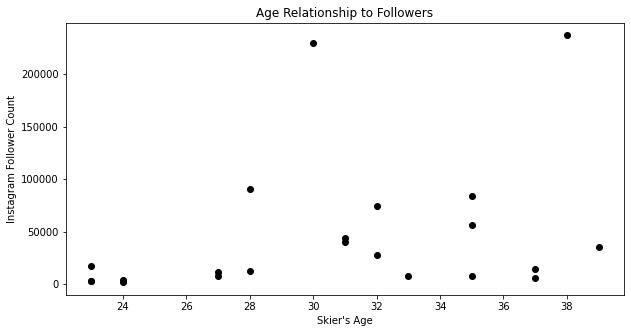

In [1709]:
ages_df = pd.concat([ages_df, followers_df], axis=1)

plt.subplots(1, 1, figsize = (10, 5))
plt.plot(ages_df['age'], ages_df['followers'],'ko')

plt.title('Age Relationship to Followers')
plt.xlabel('Skier\'s Age')
plt.ylabel('Instagram Follower Count')
plt.show()


Interstingly, this plot looks very similar to *totalElements* against follower count, let's investigate the relationship of age and *totalElements*.

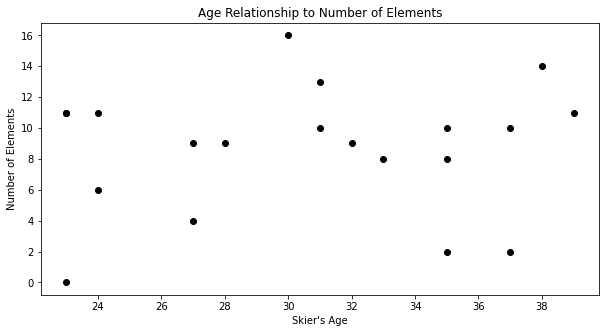

In [1710]:
plt.subplots(1, 1, figsize = (10, 5))
plt.plot(ages_df['age'], ages_df['total_elements'],'ko')

plt.title('Age Relationship to Number of Elements')
plt.xlabel('Skier\'s Age')
plt.ylabel('Number of Elements')
plt.show()

***
##Social Media Conclusion
It seems that the strongest relationship is generally as *totalElements* increases, then follower count increases. It is interesting that when age increases *totalElements* does not decrease. Perhpas signalling that the most important impact to a skier's career is the length of it. Having a strong body, and being able to keep up with younger skier's will allow you to continue earning revenue. Social media is interesting, in that you may not be the best skier, however, your personality is important. This would be hard to measure, but it seems as though a skier's career consists of so many facets. A skier should compete, perhaps having little risk as age increases, and have the goal of a long career over a risky career.